<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebooks/5_6%E5%B0%88%E9%A1%8C_%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

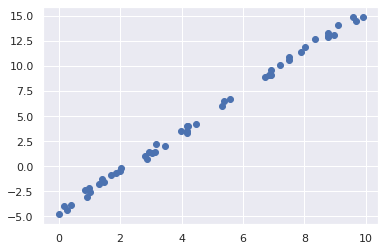

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.rand(50)
plt.scatter(x,y);

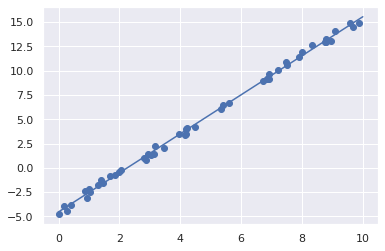

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis],y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

In [ ]:
print("Model slope:   ", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model slope:    2.0082302432277497
Model Intercept: -4.533652972099125


In [ ]:
rng = np.random.RandomState(1)
X = 10* rng.rand(100,3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

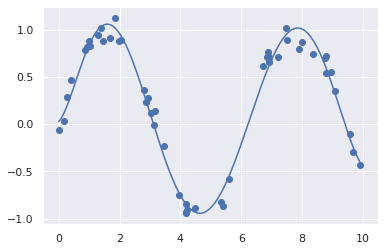

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


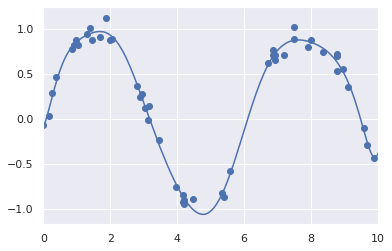

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
      """一維輸入均勻分布的高斯特徵"""

      def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
      
      @staticmethod
      def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5*np.sum(arg**2, axis))

      def fit(self, X, y=None):
        # 在數據區間中創建N個高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_)
        return self

      def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis],y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0,10);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


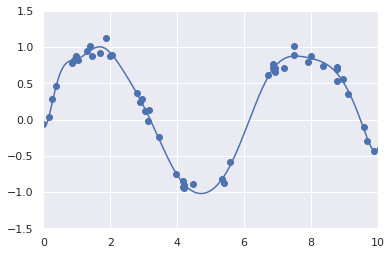

In [ ]:
 model = make_pipeline(GaussianFeatures(30), LinearRegression())
 model.fit(x[:, np.newaxis], y)
 plt.scatter(x, y)
 plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
 plt.xlim(0, 10)
 plt.ylim(-1.5, 1.5);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


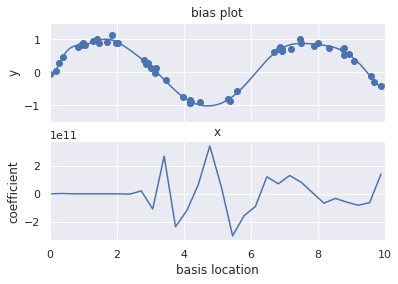

In [ ]:
 def basis_plot(model, title=None):
            fig, ax = plt.subplots(2, sharex=True)
            model.fit(x[:, np.newaxis], y)
            ax[0].scatter(x, y)
            ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
            ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
            if title:
                ax[0].set_title(title)
                ax[1].plot(model.steps[0][1].centers_,
                           model.steps[1][1].coef_)
                ax[1].set(xlabel='basis location',
                          ylabel='coefficient',
                          xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model,title='bias plot');

<pre>
下面那幅图显示了每个位置上基函数的振幅。当基函数重叠的
时候，通常就表明出现了过拟合：相邻基函数的系数相互抵消。这显然
是有问题的，如果对较大的模型参数进行惩罚（penalize），从而抑制模型剧烈波动，应该就可以解决这个问题了。这个惩罚机制被称为正则
化（regularization），有几种不同的表现形式。
</pre>

<pre>
01.  岭回归（L2范数正则化）
</pre>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


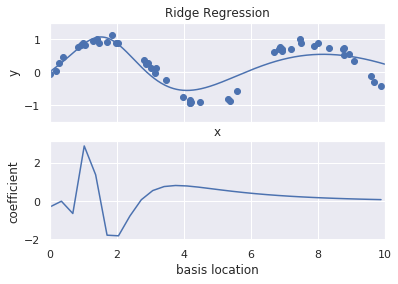

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

02.  Lasso正则化（L1
范数）

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33365443407182394, tolerance: 0.002065280097246271
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


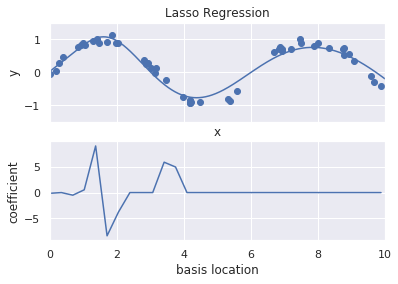

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

5.6.4　案例：预测自行车流量
## [參考一](https://juejin.im/entry/58ec4365a22b9d00633e4c9e)
## [GITHUB](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/)

In [ ]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
! git clone https://github.com/jakevdp/SeattleBike.git

Cloning into 'SeattleBike'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [ ]:
!pwd
!ls SeattleBike

/content
FremontHourly.csv  README.md  SeaTacWeather.csv  SeattleCycling.ipynb


In [ ]:
import pandas as pd
counts = pd.read_csv('SeattleBike/FremontHourly.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('SeattleBike/SeaTacWeather.csv', index_col='DATE', parse_dates=True)

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

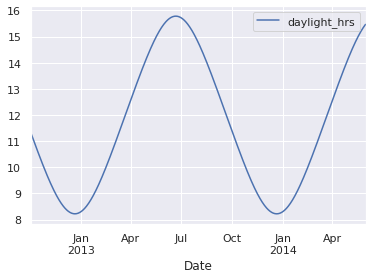

In [ ]:
def hours_of_daylight(date,axis=23.44,latitude=47.61):
    days = (date - pd.datetime(2000,12,21)).days
    m = (1. - np.tan(np.radians(latitude))*np.tan(np.radians(axis)*np.cos(days*2*np.pi/365.25)))
    return 24.*np.degrees(np.arccos(1-np.clip(m,0,2)))/180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

In [ ]:
# 温度是按照1/10摄氏度统计的，首先转换为摄氏度
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# 降雨量也是按照1/10mm统计的，转化为英寸
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [ ]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,13.90,1,0.000000
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.002740
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.005479
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.008219
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.010959


In [ ]:
column_names = ['Mon','Tue','Wed','Tue','Fri','Sat','Sun','holiday','daylight_hrs','PRCP','dry day','Temp (C)','annual']
X = daily[column_names]
y = daily['Total']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predicted'] = model.predict(X)

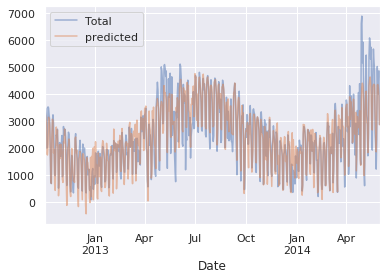

In [ ]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [ ]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              104.061695
Tue               73.701884
Wed              198.555542
Tue               73.701884
Fri             -253.294335
Sat            -1438.033147
Sun            -1469.986585
holiday        -1172.065577
daylight_hrs     153.857051
PRCP            -634.733104
dry day          563.378351
Temp (C)          60.633149
annual           217.228961
dtype: float64

In [ ]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
for i in range(1000)], 0)

In [ ]:
print(pd.DataFrame({'effect': params.round(0),
                            'error': err.round(0)}))

              effect  error
Mon            104.0   75.0
Tue             74.0   37.0
Wed            199.0   67.0
Tue             74.0   37.0
Fri           -253.0   72.0
Sat          -1438.0   65.0
Sun          -1470.0   64.0
holiday      -1172.0  197.0
daylight_hrs   154.0    8.0
PRCP          -635.0   70.0
dry day        563.0   43.0
Temp (C)        61.0    4.0
annual         217.0   47.0
